## Install and Import Library

In [2]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import missingno as msn

print('Pandas version:', pd.__version__)
print('Numpy version:', np.__version__)
print('Seaborn version:', sns.__version__)
print('Matplotlib version:', matplotlib.__version__)
print('Missingno version:', msn.__version__)

Pandas version: 1.5.2
Numpy version: 1.22.3
Seaborn version: 0.12.2
Matplotlib version: 3.6.2
Missingno version: 0.4.2


# Load Data

In [3]:
# load data and see first 14 features
df=pd.read_csv('hotel_bookings_data.csv')
df.iloc[:,:14].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka


In [4]:
# See the next 14 features
df.iloc[:,15:].head()

,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


# Handling Missing Values

In [5]:
# Missing value identify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<AxesSubplot: >

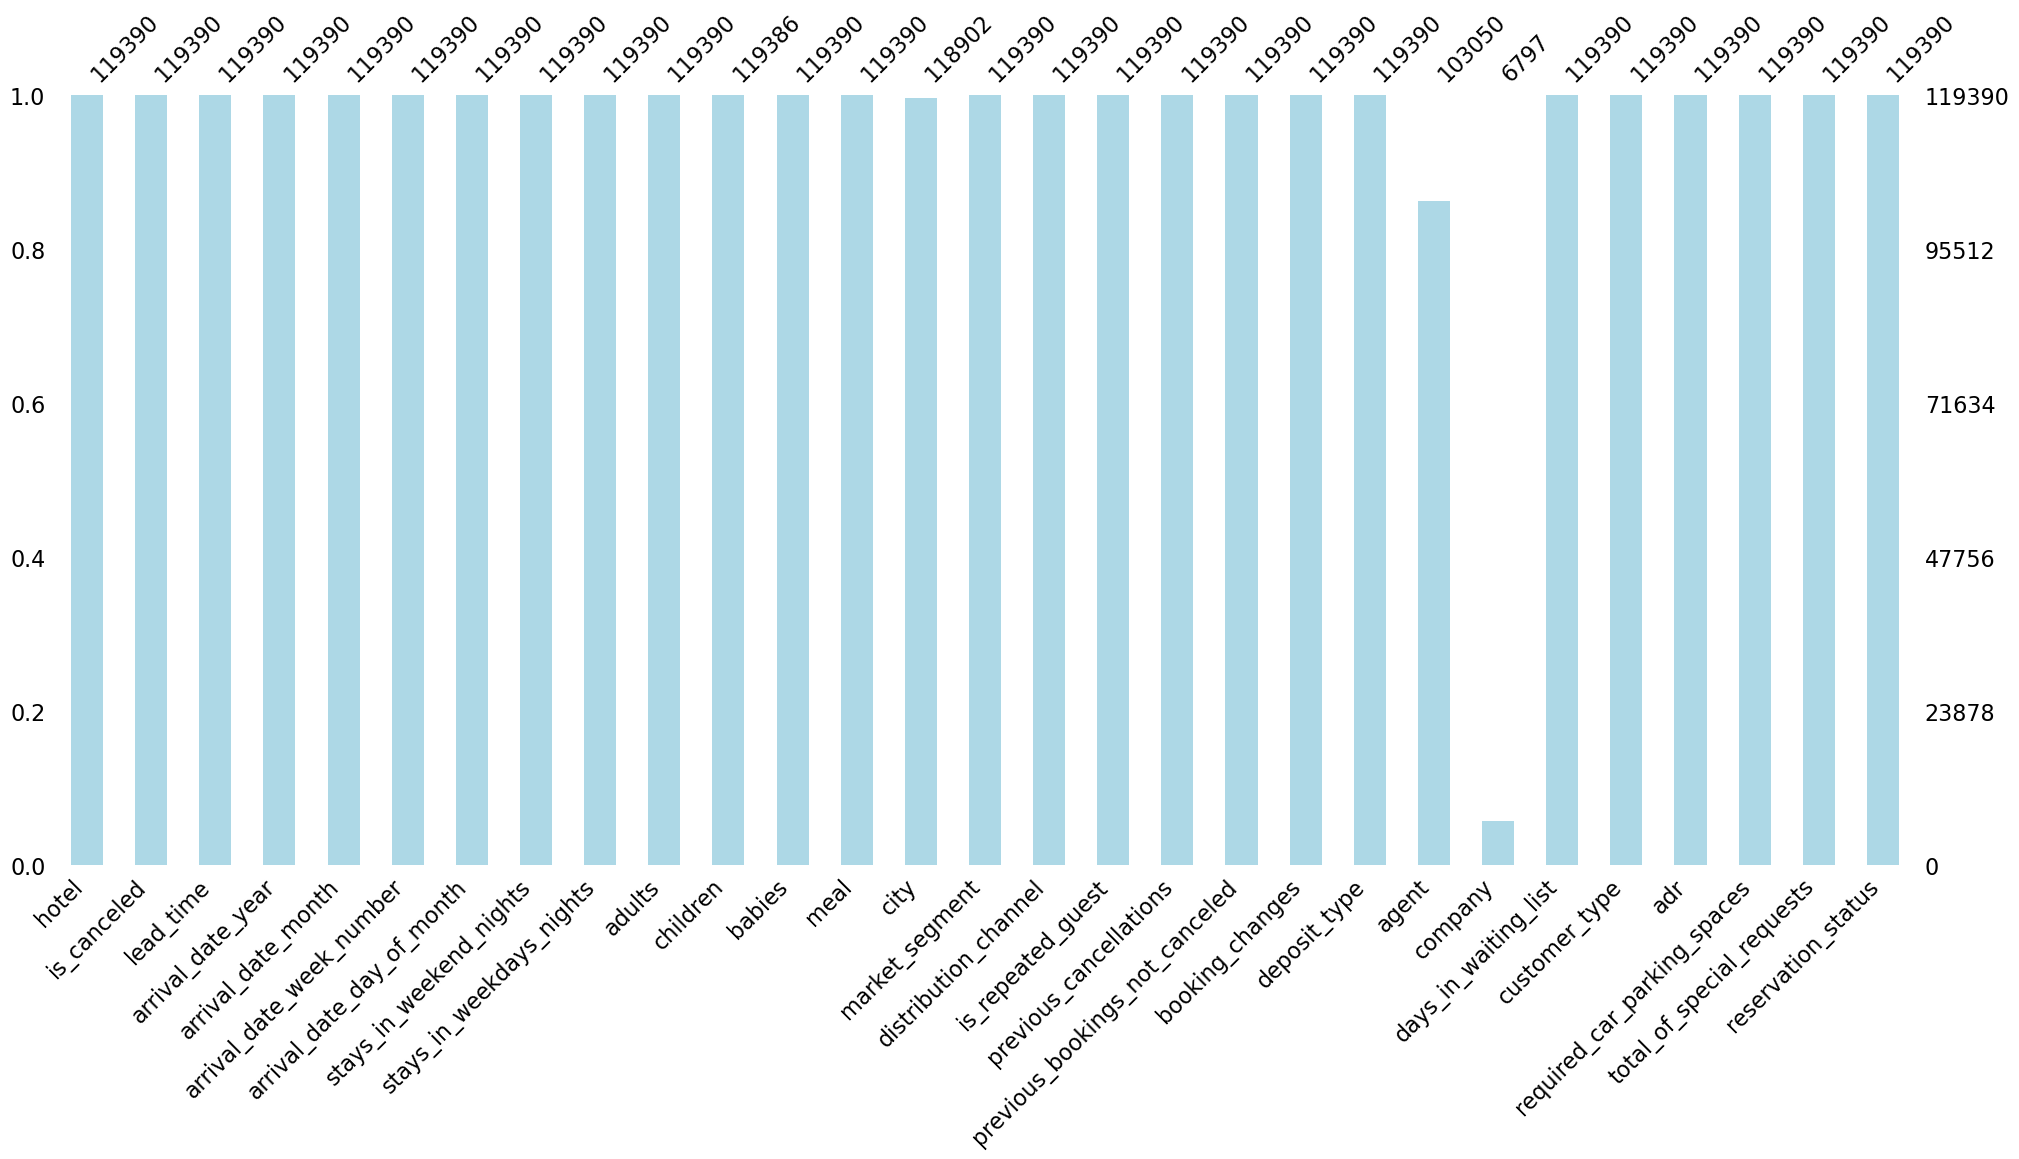

In [6]:
#visualization of missing value
plt.figure(figsize=(10,7))
msn.bar(df, color='lightblue')

In [7]:
# Calculate missing value in %
mv = df.isnull().sum().reset_index()
mv.columns = ['feature', 'missing_value']
mv['percentage'] = round((mv['missing_value']/len(df))*100,4)
mv = mv.sort_values('percentage',ascending=False).reset_index(drop=True)
mv = mv[mv['percentage']>0]
mv

,feature,missing_value,percentage
0,company,112593,94.3069
1,agent,16340,13.6862
2,city,488,0.4087
3,children,4,0.0034


In [8]:
#handling missing values
df['children']=df['children'].fillna(0)
df['city']=df['city'].fillna('Unknown')
df['company']=df['company'].fillna(0)
df['agent']=df['agent'].fillna(0)
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [9]:
# Change data type of [children],[agent],[company] to int
df['company']=df['company'].astype('int64')
df['children']=df['children'].astype('int64')
df['agent']=df['agent'].astype('int64')

# Handling Incorrect Values

### Categorical data

In [10]:
# create list of categorical data
cat_d = list(df.select_dtypes(include='object'))
print(cat_d)
print("Num of categorical data:", len(cat_d))

['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status']
Num of categorical data: 9


In [11]:
# Distribution of values in each categorical feature
for i in cat_d:
    print(f'''Num of value for column {i}:''')
    print(df[i].value_counts())
    print()

Num of value for column hotel:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Num of value for column arrival_date_month:
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64

Num of value for column meal:
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

Num of value for column city:
Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 178, dtype: int64

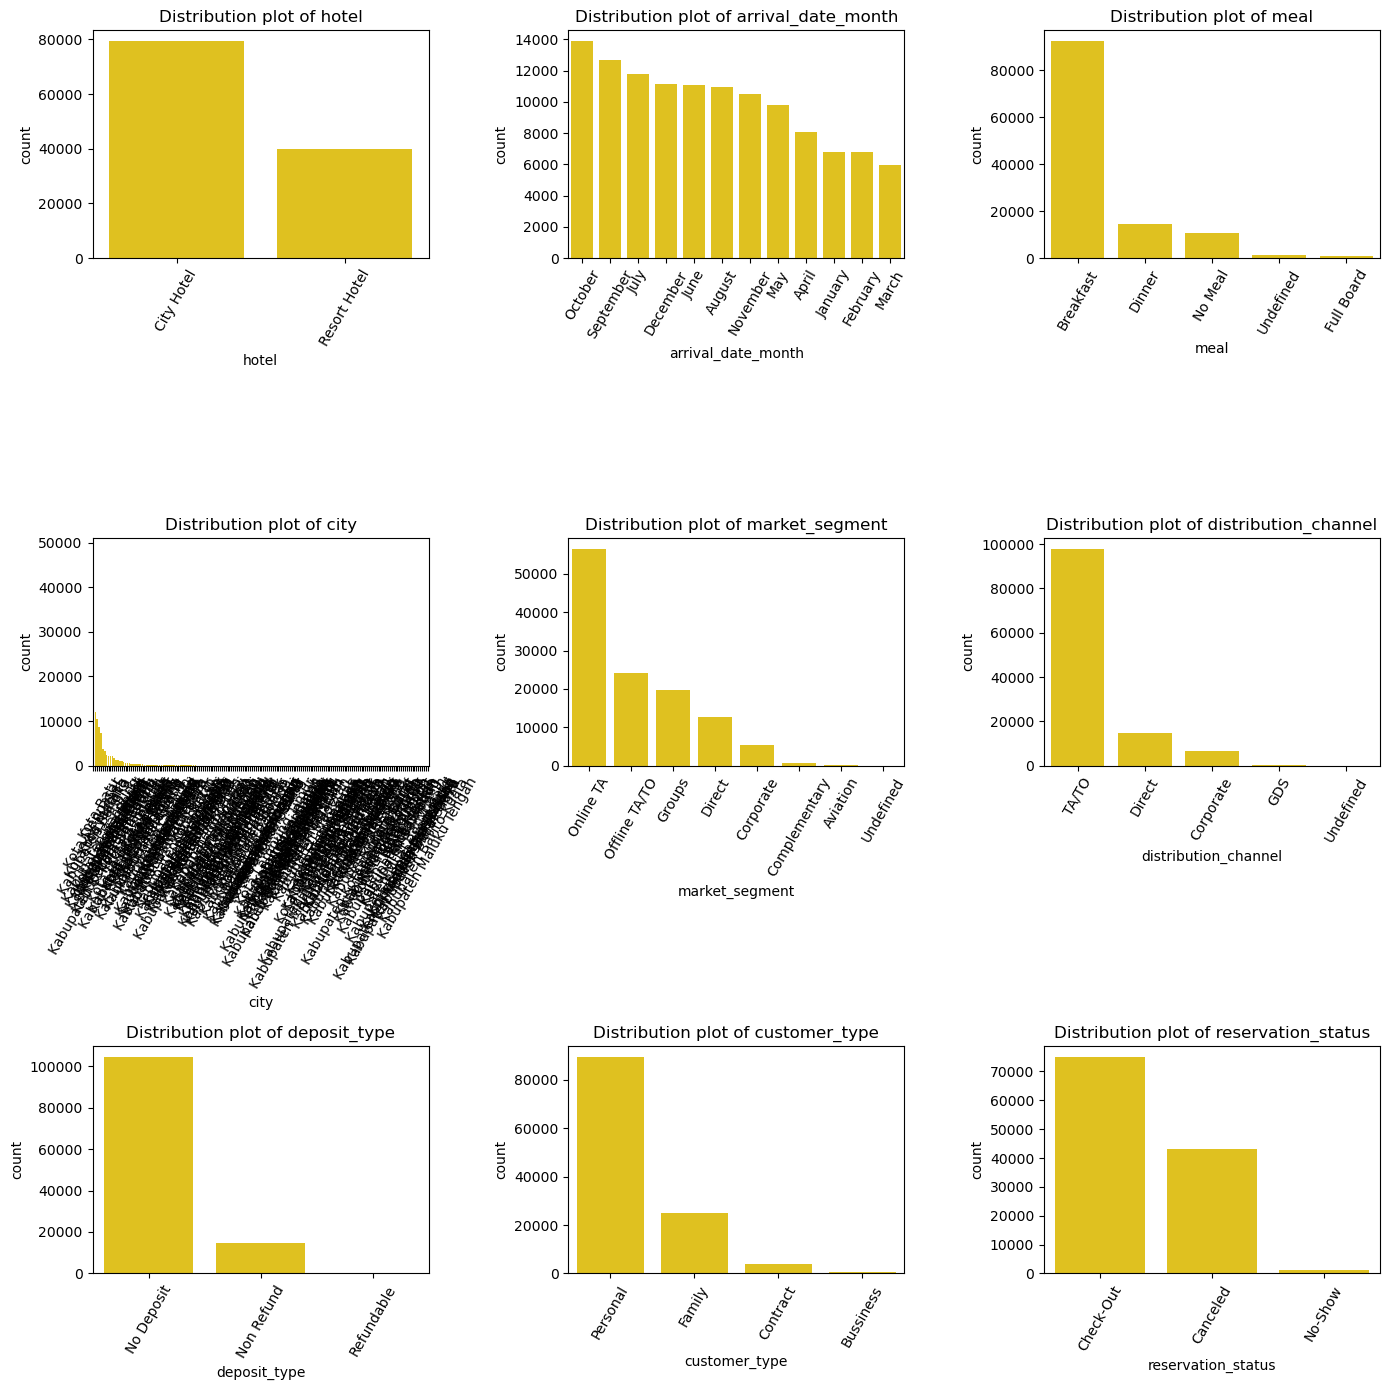

In [12]:
# Distribution visualization
plt.figure(figsize=(14,14))
for i in range(0, len(cat_d)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[cat_d[i]], color='gold', order=df[cat_d[i]].value_counts().index)
    plt.title('Distribution plot of {}'.format(cat_d[i]))
    plt.tight_layout()
    plt.xticks(rotation = 60)
    
plt.show()

From the figure above, there are "undefined" values, which are in [meal], [market_segment], [distribution_channel].For [meal], in order to encounter the way why there are some "undefined" values in [meal], it need to check value distribution of [meal]'s undefined in [hotel], as first attempt to figure the why.

In [13]:
meal_table= pd.pivot_table(df,index='meal',
                           columns='hotel', values='city',aggfunc='count')
meal_table

hotel,City Hotel,Resort Hotel
meal,,
Breakfast,62305.0,30005.0
Dinner,6417.0,8046.0
Full Board,44.0,754.0
No Meal,10564.0,86.0
Undefined,NaN,1169.0


From output above, it possible to replace "undefined" in [meal] with "No Meal", since it has significant total of number for 'No Meal' between City Hotel and Resort Hotel. For "undefined" value in [market_segment] and [distribution_channel] will replace by the mode, since it has significant total of number rather than other values.

In [14]:
# Handling invalid values by replace them
df['meal'] = df['meal'].replace(['Undefined'], 'No Meal')
df['market_segment'] = df['market_segment'].replace(['Undefined'], 'Online TA')
df['distribution_channel'] = df['distribution_channel'].replace(['Undefined'],'TA/TO')

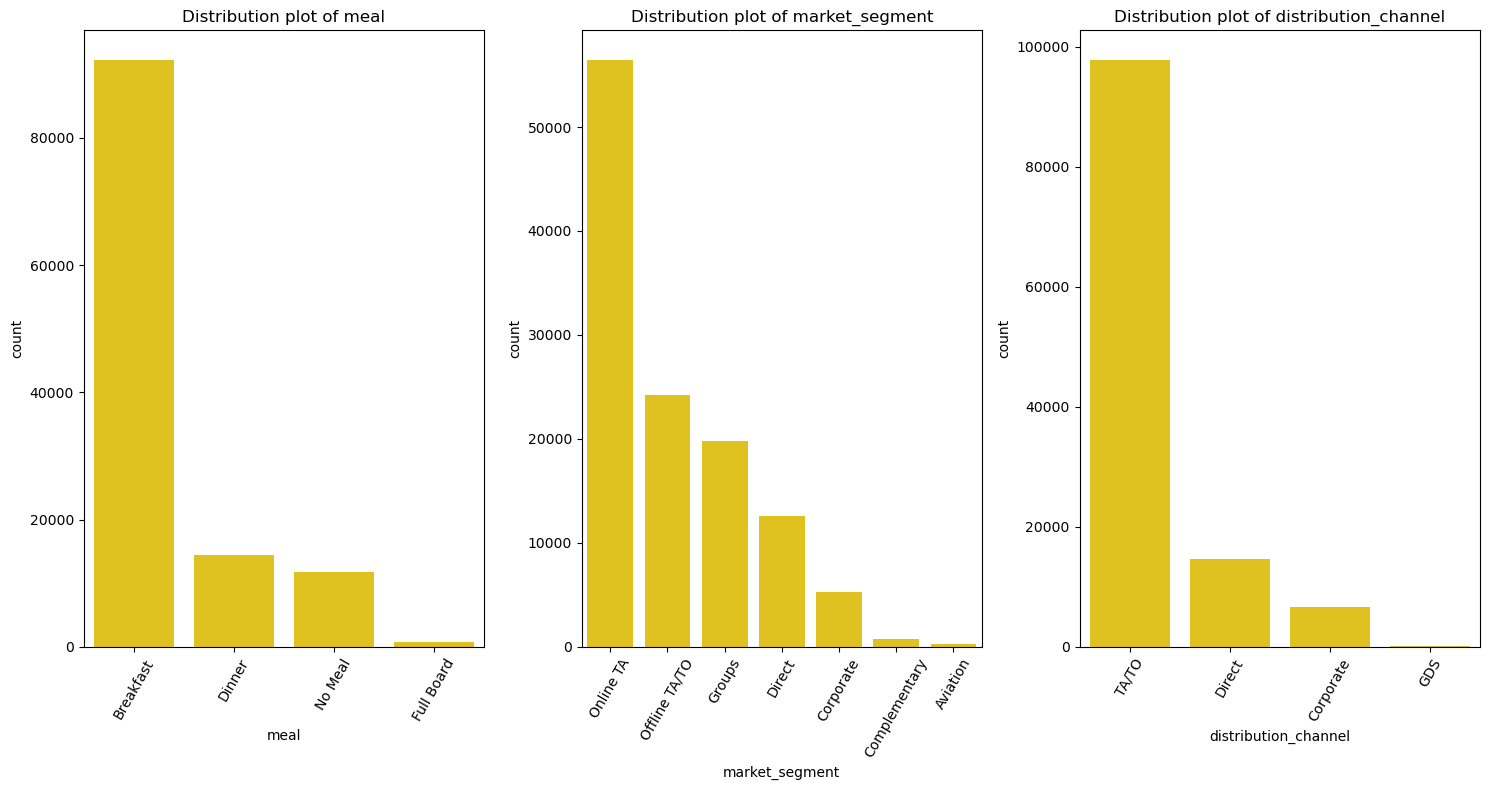

In [15]:
cat_changed = ['meal','market_segment', 'distribution_channel']
plt.figure(figsize=(15,8))
for i in range(0, len(cat_changed)):
    plt.subplot(1,3, i+1)
    sns.countplot(x=df[cat_changed[i]], color='gold', order = df[cat_changed[i]].value_counts().index)
    plt.title('Distribution plot of {}'.format(cat_changed[i]))
    plt.tight_layout()
    plt.xticks(rotation=60)
plt.show()

### Numerical Data

In [16]:
#create list of numerical data
num_d = list(df.select_dtypes(include=['float64','int64']))
print(num_d)
print("Num of numerical data:", len(num_d))

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
Num of numerical data: 20


In [17]:
for i in num_d:
    print(f'''Num of value for column {i}:''')
    print(df[i].value_counts())
    print()

Num of value for column is_canceled:
0    75166
1    44224
Name: is_canceled, dtype: int64

Num of value for column lead_time:
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: lead_time, Length: 479, dtype: int64

Num of value for column arrival_date_year:
2018    56707
2019    40687
2017    21996
Name: arrival_date_year, dtype: int64

Num of value for column arrival_date_week_number:
33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43    2352
44    2272
14    2264
37    2229
8     2216
36    2167
10    2149
9     2117
7     2109
12    2083
11    2070
45    1941
53    1816
49    1782
47    1685
46    1574
6     1508
50    1505
48    1504
4     1487
5     

C:\Users\istifa\AppData\Local\Temp\ipykernel_12384\3998719640.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_d[i]], color='orange')
C:\Users\istifa\AppData\Local\Temp\ipykernel_12384\3998719640.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_d[i]], color='orange')
C:\Users

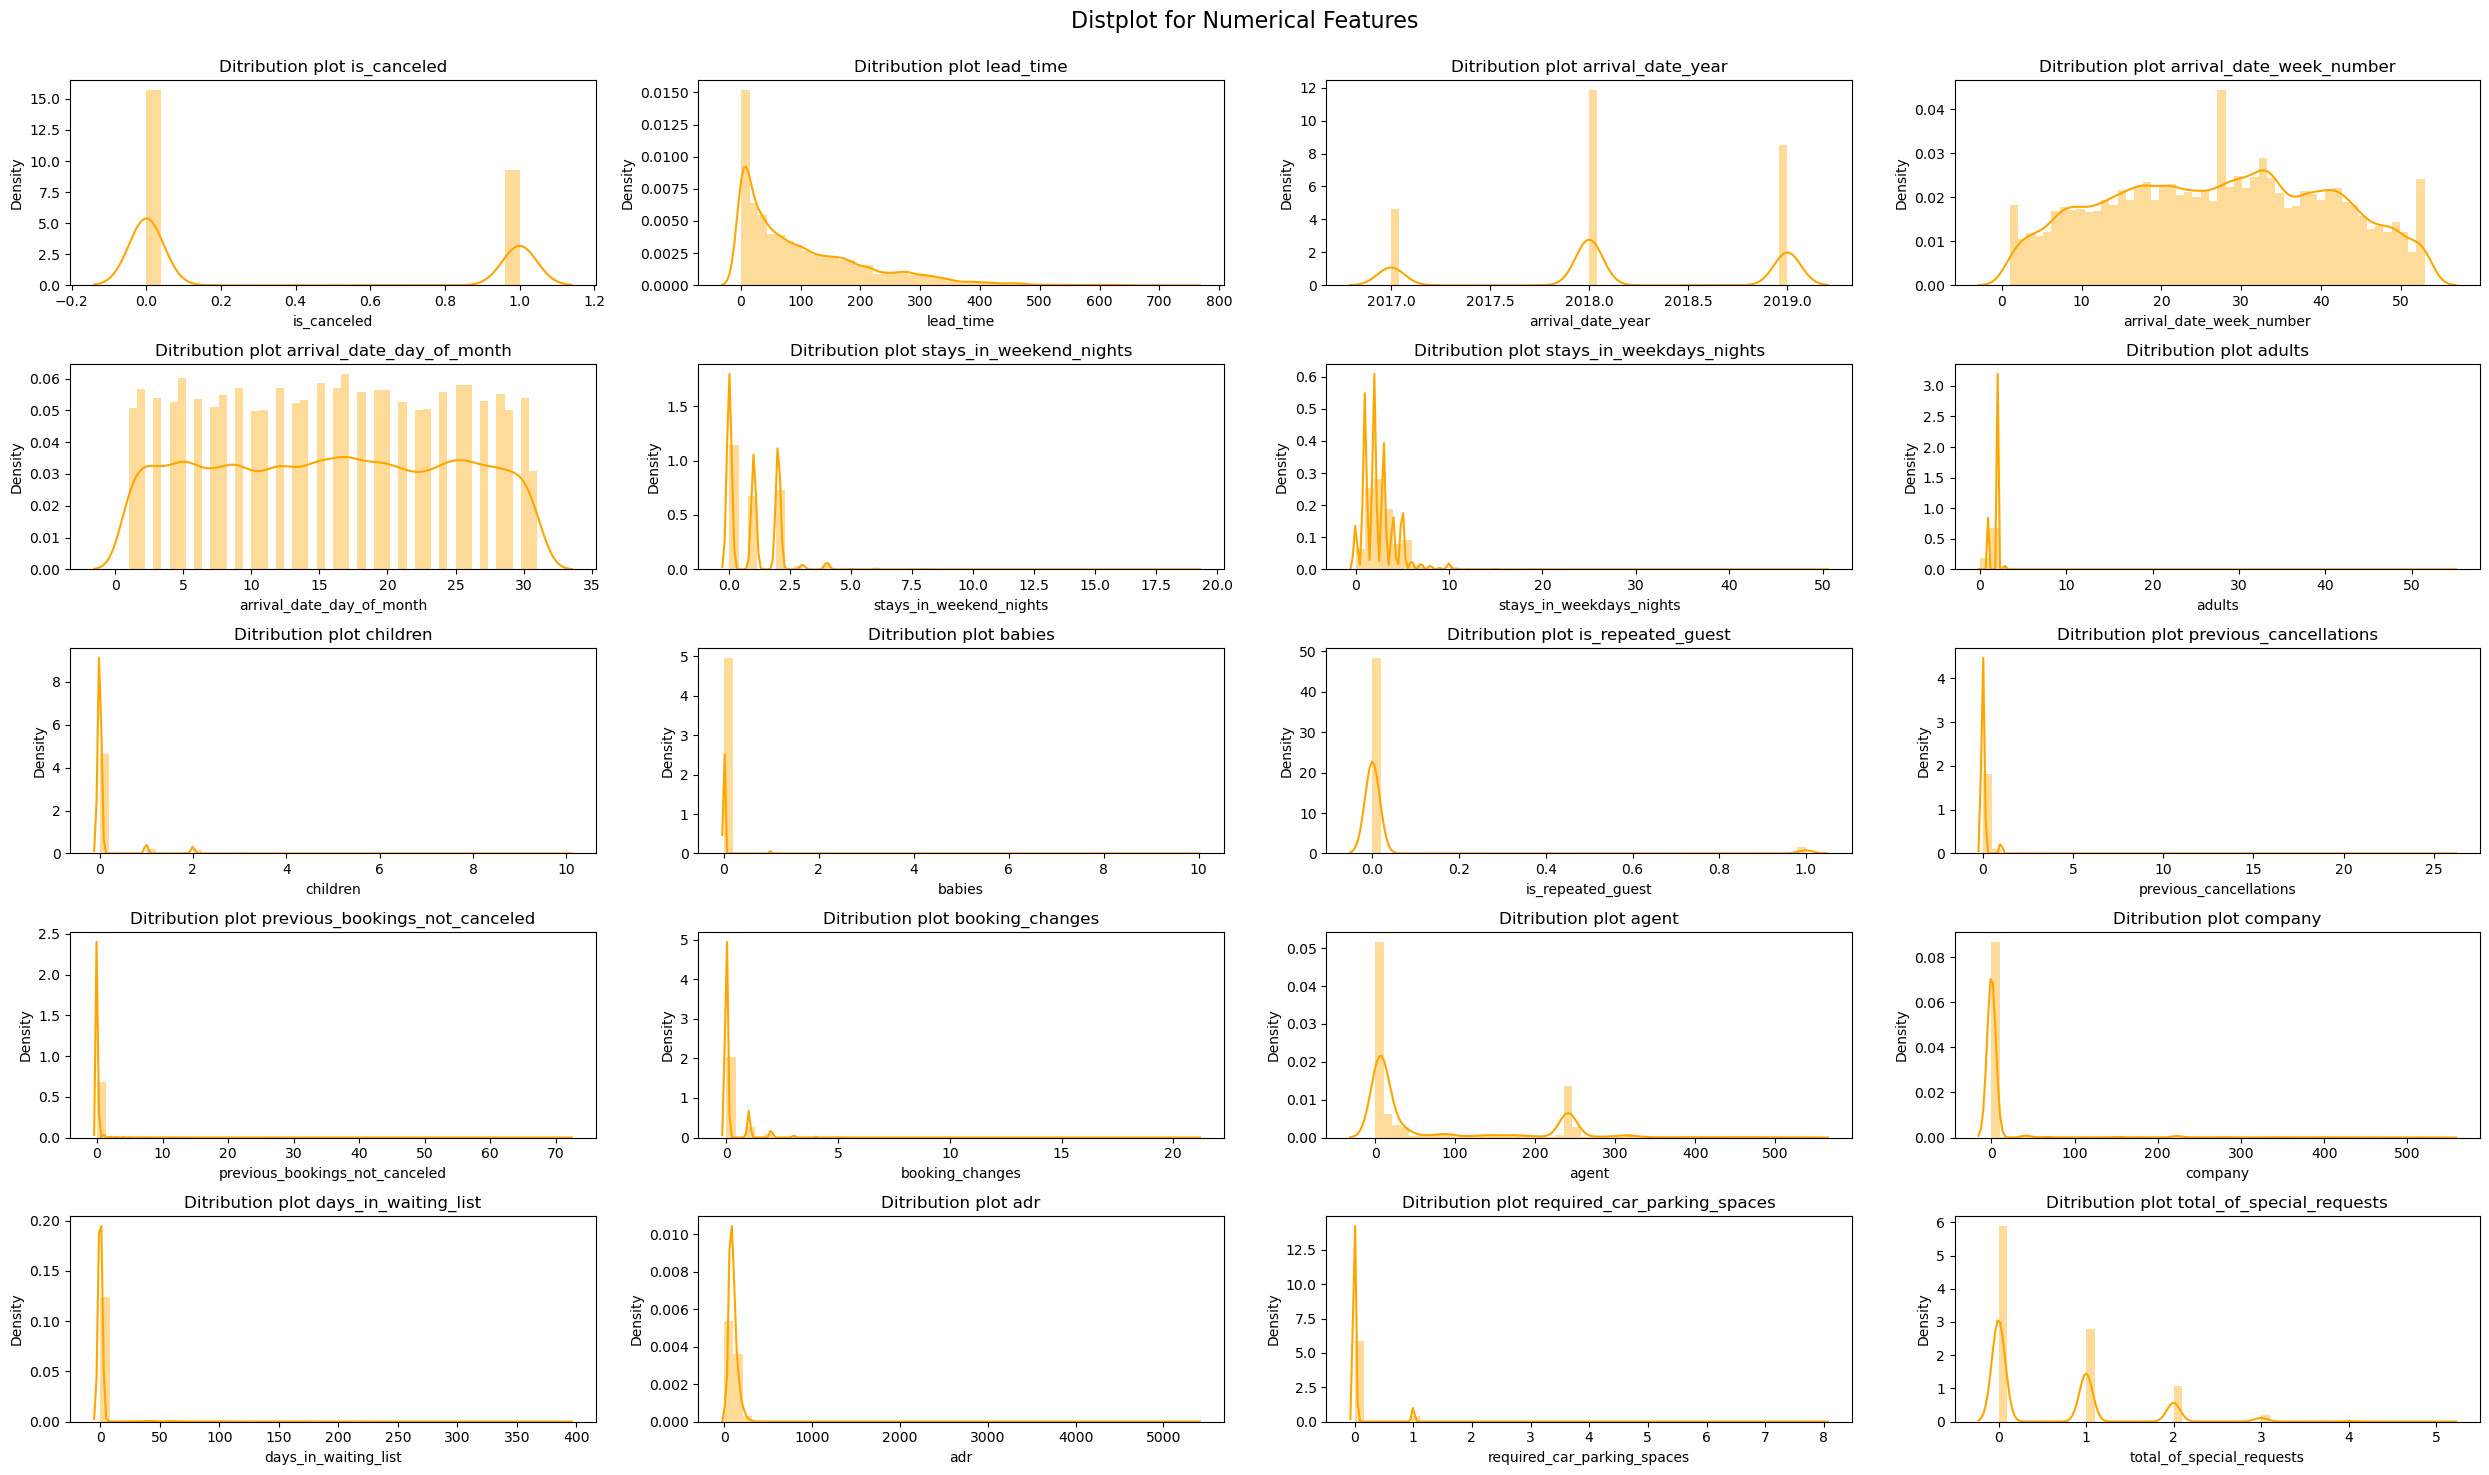

In [18]:
#create distribution plot for numerical features
plt.figure(figsize=(25,15))
for i in range(0, len(num_d)):
    plt.subplot(5,4, i+1)
    sns.distplot(df[num_d[i]], color='orange')
    plt.title('Ditribution plot {}'.format(num_d[i]))
    plt.suptitle('Distplot for Numerical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout()
plt.show()

In order to remove unnecessary data, which are bookings by 0 guest and 0 night. Creating temporary features is needed, which are [total_guests] and [total_day]

In [19]:
#create temporary features
df['total_guests']=df['adults']+df['children']+df['babies']
print('Data bookings with 0 guest: {0} out of {1} all data'.format(df[df['total_guests'] == 0].shape[0], df.shape[0]))
df['total_day'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
print('Data bookings with 0 night: {0} out of {1} all data'.format(df[df['total_day'] == 0].shape[0], df.shape[0]))

# Remove unnecessary data
df_clean = df[(df['total_guests'] > 0) & (df['total_day'] > 0)].copy()
print('before cleaning:', df.shape[0])
print('after cleaning:', df_clean.shape[0])

Data bookings with 0 guest: 180 out of 119390 all data
Data bookings with 0 night: 715 out of 119390 all data
before cleaning: 119390
after cleaning: 118565


### Monthly hotel booking analysis based on hotel type

In [20]:
#create duplicate data frame from df_clean
df2 = df_clean.copy()

In [21]:
df2_gb = df2.groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
df2_gb.columns = ['hotel_type','arrival_month','unique_year','total_booking']
df2_gb

,hotel_type,arrival_month,unique_year,total_booking
0,City Hotel,April,2,4917
1,City Hotel,August,2,7874
2,City Hotel,December,2,7554
3,City Hotel,February,2,4097
4,City Hotel,January,2,4309
5,City Hotel,July,2,8184
6,City Hotel,June,2,7458
7,City Hotel,March,2,3712
8,City Hotel,May,2,6411
9,City Hotel,November,2,7377


In [22]:
#Data normalization through determination of monthly order avg volume over various years
df2_gb['Average_Booking'] = round(df2_gb['total_booking']/df2_gb['unique_year'])
df2_gb

,hotel_type,arrival_month,unique_year,total_booking,Average_Booking
0,City Hotel,April,2,4917,2458.0
1,City Hotel,August,2,7874,3937.0
2,City Hotel,December,2,7554,3777.0
3,City Hotel,February,2,4097,2048.0
4,City Hotel,January,2,4309,2154.0
5,City Hotel,July,2,8184,4092.0
6,City Hotel,June,2,7458,3729.0
7,City Hotel,March,2,3712,1856.0
8,City Hotel,May,2,6411,3206.0
9,City Hotel,November,2,7377,3688.0


In [23]:
# for visualization purposes, need to sort months and abbreviate the month's name
ordered_month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df2_gb['month'] = df2_gb['arrival_month'].str[:3]
df2_gb['month'] = pd.Categorical(df2_gb['month'], categories=ordered_month, ordered=True)
df2_gb

,hotel_type,arrival_month,unique_year,total_booking,Average_Booking,month
0,City Hotel,April,2,4917,2458.0,Apr
1,City Hotel,August,2,7874,3937.0,Aug
2,City Hotel,December,2,7554,3777.0,Dec
3,City Hotel,February,2,4097,2048.0,Feb
4,City Hotel,January,2,4309,2154.0,Jan
5,City Hotel,July,2,8184,4092.0,Jul
6,City Hotel,June,2,7458,3729.0,Jun
7,City Hotel,March,2,3712,1856.0,Mar
8,City Hotel,May,2,6411,3206.0,May
9,City Hotel,November,2,7377,3688.0,Nov


C:\Users\istifa\AppData\Local\Temp\ipykernel_12384\1516430892.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


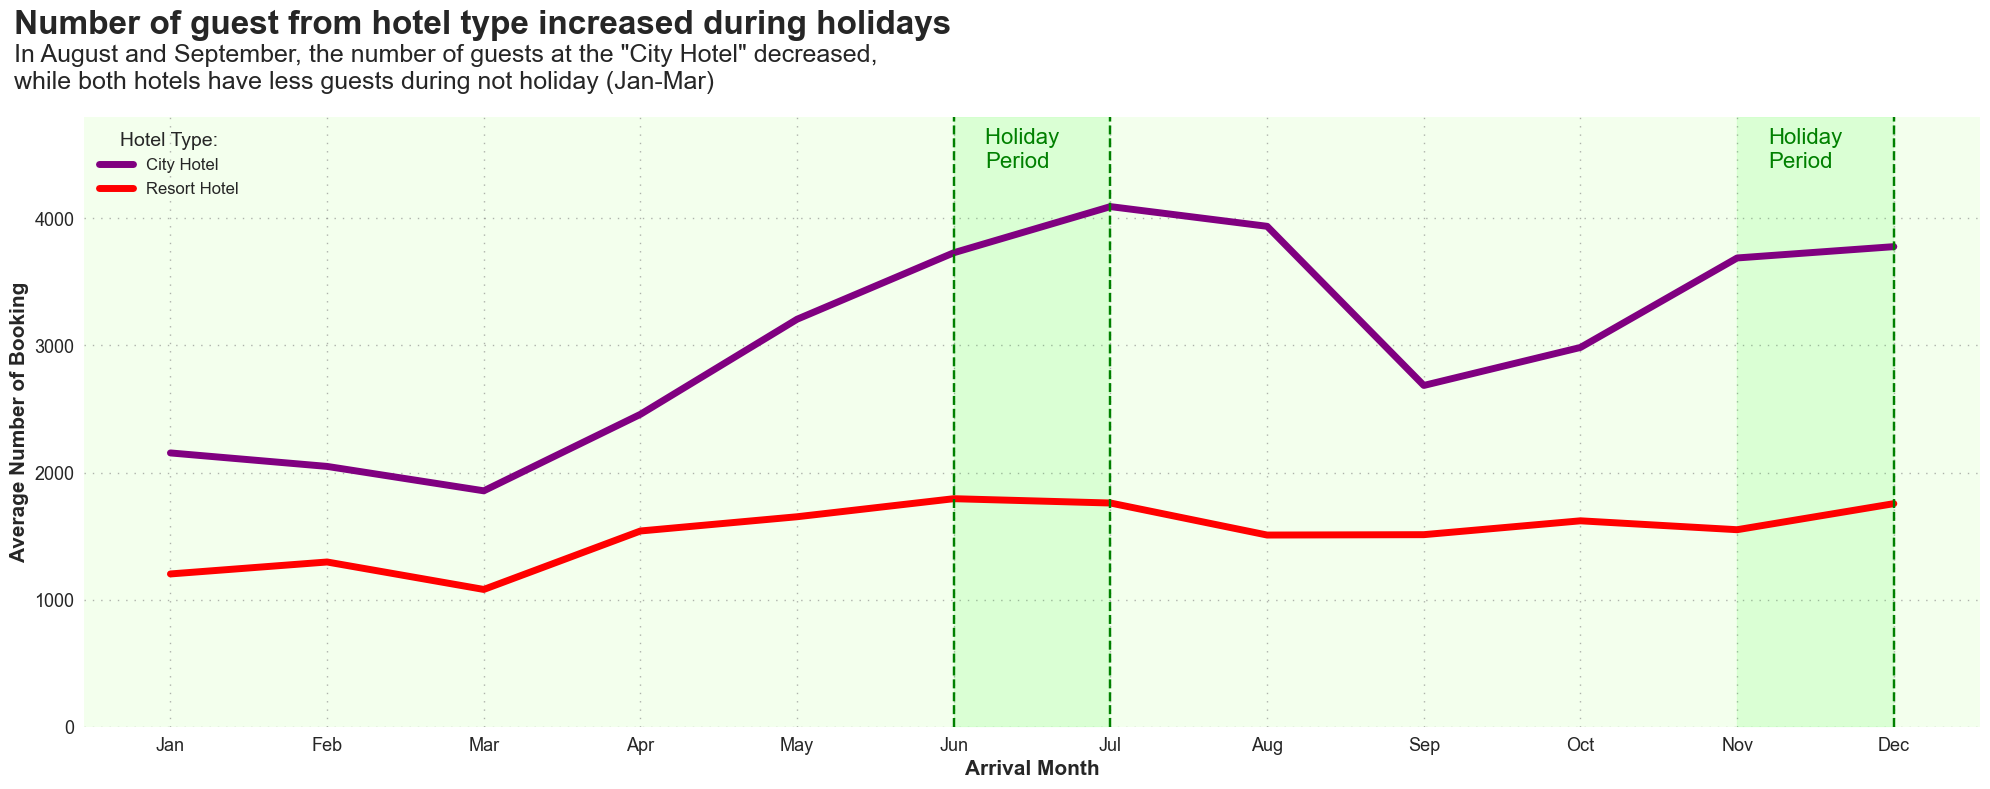

In [24]:
#Visualize
style.use('seaborn')
fig, ax = plt.subplots(1,1,figsize=(20,8))
ax = sns.lineplot(x='month', y='Average_Booking', hue='hotel_type',
                 size='hotel_type', sizes=(5,5), data=df2_gb, palette=['purple','red'])
ax.tick_params(axis='both', which='major', labelsize=13)

ax.legend(title='Hotel Type:', title_fontsize=14, prop={'size':12}, fontsize='x-large')
ax.text(x=-1, y=5450, s='Number of guest from hotel type increased during holidays', fontsize=24, fontweight='bold')
ax.text(x=-1, y=5020, s='In August and September, the number of guests at the "City Hotel" decreased,\nwhile both hotels have less guests during not holiday (Jan-Mar)', fontsize=18)

ax.axvline(5,ls='--',color='green')
ax.axvline(6,ls='--', color='green')
ax.stackplot(np.arange(5,7,1),[[4800]], color='lime', alpha=0.1)
ax.text(x=5.2, y=4400, s='Holiday \nPeriod', fontsize=16, color='green')

ax.axvline(11, ls='--', color='green')
ax.stackplot(np.arange(10,12,1),[[4800]], color='lime', alpha=0.1)
ax.text(x=10.2, y=4400, s='Holiday\nPeriod', fontsize=16, color='green')

ax.set_facecolor('#f3ffed')
ax.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.6)
ax.grid(which="major", axis="x", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.6)

plt.xlabel('Arrival Month', fontsize=15, fontweight='bold')
plt.ylabel('Average Number of Booking', fontsize=15, fontweight='bold')
plt.ylim(0,4800)
plt.tight_layout()


During the holiday season, both hotels experience a higher influx of guests, although the City Hotel tends to have more guests than the Resort Hotel. In Indonesia, schools typically have a break from June to July, which is a popular time for families to travel together, resulting in an increase in visitors to both hotels. This information can be used to justify the timing of marketing strategies. However, from August to September, the City Hotel experiences a significant drop in guest numbers due to the resumption of the school term, which causes a decline from the holiday period.

The average number of bookings in March is the lowest for both types of hotels.


### Analyze the Effect of Length of Stay on Cancellation Rates of Hotel Booking

This study aims to investigate how the duration of a guest's stay can influence the cancellation rates of hotel bookings. In addition to examining customer behavior when booking hotels, it is essential to measure the success of a hotel business by monitoring cancellation rates. A high number of cancellations can have a negative impact on the hotel's performance. Therefore, identifying the factors that contribute to order cancellations is crucial. The focus of this analysis is on exploring the relationship between the length of stay and the rate of cancellation for hotel bookings.

In [25]:
# create a copy data frame from df_clean
df3 = df_clean.copy()

C:\Users\istifa\AppData\Local\Temp\ipykernel_12384\4092152984.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


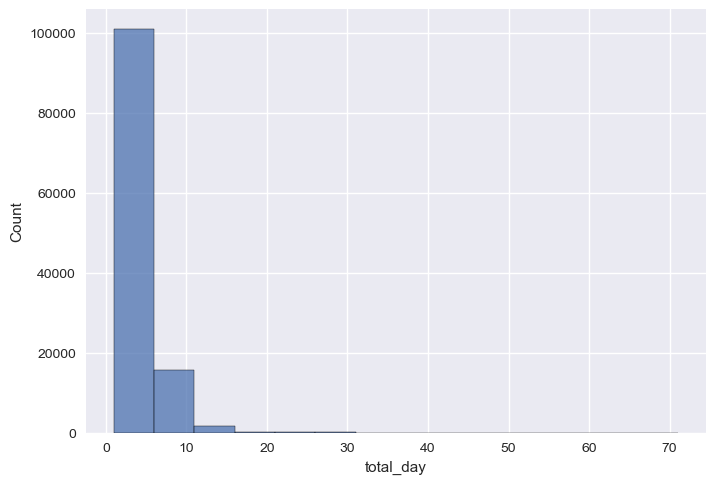

In [26]:
#distribution of stay_duration feature
style.use('seaborn')
sns.histplot(data=df3, x='total_day', binwidth=5);

the distribution of stay_duration is right skewed. We will grouping that values into 4 groups.

- 1-7 days
- 8-14 days
- 15-21 days
- more than 21 days

In [27]:
# Grouping stay_duration into 4 groups, 1-7 days, 8-14 days, 14-21 days and >21 days
df3['stay_duration_group'] = np.where(df3.total_day < 8, 7, 
                            (np.where((df3.total_day > 7) & (df3.total_day < 15), 14,
                            (np.where((df3.total_day > 14) & (df3.total_day < 22),21 , 22)))))

# Using group by to aggregate the data to count monthly hotel booking based on hotel type
df3_agg = df3.groupby(['hotel', 'is_canceled', 'stay_duration_group'])['arrival_date_month'].count().reset_index(name='num_bookings')
df3_pivot = df3_agg.pivot_table(index=['hotel', 'stay_duration_group'], columns='is_canceled', values='num_bookings').reset_index()

# % cancellation rate
df3_pivot['cancellation_rate'] = round(df3_pivot[1]/(df3_pivot[0]+df3_pivot[1])*100, 2)
df3_pivot

is_canceled,hotel,stay_duration_group,0,1,cancellation_rate
0,City Hotel,7,45287,32391,41.70
1,City Hotel,14,511,558,52.20
2,City Hotel,21,29,76,72.38
3,City Hotel,22,6,41,87.23
4,Resort Hotel,7,25754,9907,27.78
5,Resort Hotel,14,2650,1078,28.92
6,Resort Hotel,21,90,79,46.75
7,Resort Hotel,22,62,46,42.59


C:\Users\istifa\AppData\Local\Temp\ipykernel_12384\2007230052.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


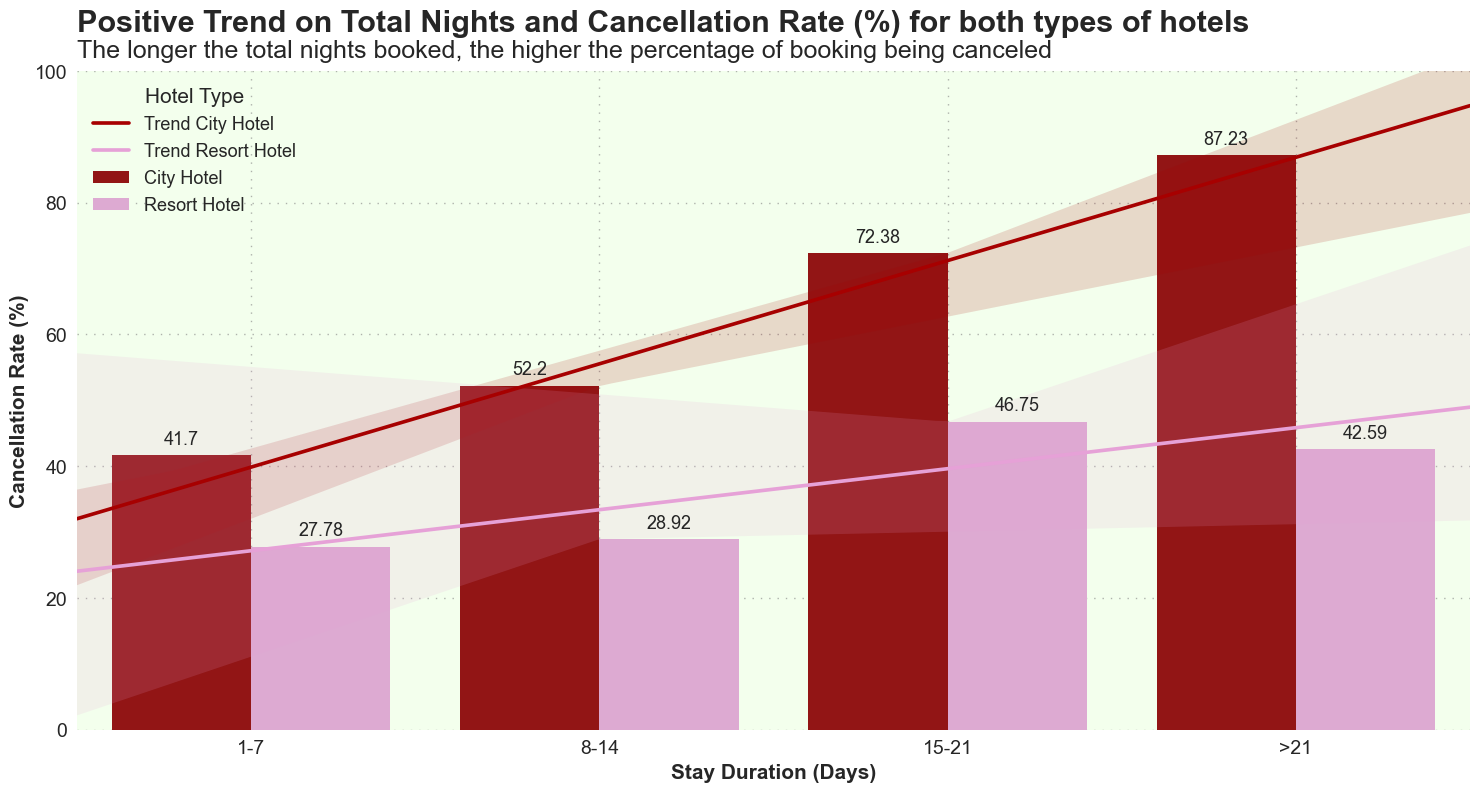

In [28]:
# Visualization total nights and cancellation rate
style.use('seaborn')

fig, ax = plt.subplots(figsize=(15, 8))

cols = ['#A70000', '#E6A1D7']
sns.barplot(x='stay_duration_group', y='cancellation_rate', hue='hotel', data=df3_pivot, palette=cols)

sns.regplot(x=np.arange(0, len(df3_pivot[df3_pivot['hotel'] == 'City Hotel'])), y='cancellation_rate', data=df3_pivot[df3_pivot['hotel'] == 'City Hotel'], 
            scatter=False, label='Trend City Hotel', truncate=False, color='#0000')

sns.regplot(x=np.arange(0, len(df3_pivot[df3_pivot['hotel'] == 'City Hotel'])), y='cancellation_rate', data=df3_pivot[df3_pivot['hotel'] == 'Resort Hotel'],
            scatter=False, label='Trend Resort Hotel', truncate=False, color='#E6A1D7')

ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_facecolor('#f3ffed')
ax.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.6)
ax.grid(which="major", axis="x", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.6)
ax.text(x=-0.5, y=106, s='Positive Trend on Total Nights and Cancellation Rate (%) for both types of hotels', fontsize=22, fontweight='bold')
ax.text(x=-0.5, y=102, s='The longer the total nights booked, the higher the percentage of booking being canceled', fontsize=18)
ax.legend(title='Hotel Type', title_fontsize=15, prop={'size':13})

plt.bar_label(ax.containers[0], fontsize=13, padding=5)
plt.bar_label(ax.containers[1], fontsize=13, padding=5)

plt.xticks(range(0,4,1), labels=['1-7', '8-14', '15-21', '>21'])
plt.xlabel('Stay Duration (Days)', fontsize=15, fontweight='bold')
plt.ylabel('Cancellation Rate (%)', fontsize=15, fontweight='bold')
plt.ylim(0, 100)
plt.xlim(-0.5, 3.5)
plt.tight_layout()

Based on the information provided, we can conclude that:

There is a positive correlation between the length of stay and the cancellation rate, with city hotels exhibiting a steeper trend than resort hotels.
Both hotels experience higher cancellation rates, with city hotels experiencing the highest rates for stays longer than 21 days (87.23%), and resort hotels for stays lasting between 15 and 21 days (46.75%).
To mitigate this issue, hotels should consider implementing a cancellation policy that includes higher fees for longer stays, as the data suggests a positive relationship between length of stay and cancellation rates.

### Analyze the Effect of Booking Lead Time on Cancellation Rates of Hotel Bookings

In the hotel industry, customers are typically permitted to book accommodations in advance of their arrival date, with some booking only a few days in advance while others reserve rooms several months beforehand. This study seeks to determine if the length of time between the booking date and the customer's arrival date has an impact on the rate of hotel booking cancellations.

In [29]:
# create a copy data frame from df_clean
df4 = df_clean.copy()

C:\Users\istifa\AppData\Local\Temp\ipykernel_12384\757754373.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


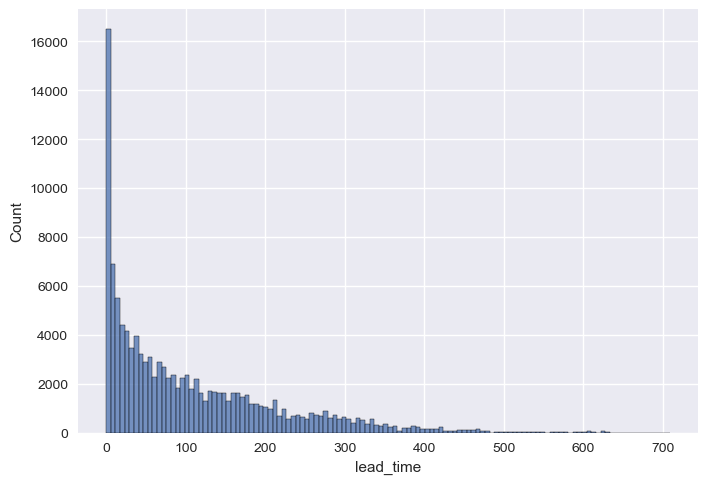

In [30]:
# check lead_time distribution feature
style.use('seaborn')
sns.histplot(data=df3, x='lead_time');

We can see that lead_time is right-skewed. Within 30 days, we will form groups. but first, let's we check the maximum value of lead_time.

In [31]:
print("maximum value of 'lead_time' is:", max(df['lead_time']))

maximum value of 'lead_time' is: 737


In [32]:
#Because the maximum value is to far, we need to limit at least 390 or 13 months . value other than that put in more than one year
df4['lead_times'] = np.where(df4['lead_time'] > 360, 390, df4['lead_time'])
df4['lead_times'].value_counts()

0      6007
390    3412
1      3386
2      2042
3      1804
       ... 
357      18
331      16
345      14
347      12
354       9
Name: lead_times, Length: 362, dtype: int64

In [33]:
#make list variable multiple of 30
bins = list(np.arange(0,max(df4['lead_times'])+30, 30))
print(bins)

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390]


In [34]:
#make label multiple of 30
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
print(labels)

['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180-210', '210-240', '240-270', '270-300', '300-330', '330-360', '360-390']


In [35]:
#separate the array elements into different bins
df4['lead_time_group'] = pd.cut(df4['lead_times'],bins=bins, include_lowest=True, labels=labels)
df4['lead_time_group'].value_counts()

0-30       38094
30-60      16896
60-90      12541
90-120     10414
120-150     8126
150-180     7844
180-210     5649
210-240     4303
270-300     3419
360-390     3412
240-270     3400
300-330     2754
330-360     1713
Name: lead_time_group, dtype: int64

In [36]:
#grouping the data by hotel, lead_time_group and is_canceled and we aggregate lead_times with count
df4_gb = df4.groupby(['hotel','lead_time_group','is_canceled']).agg({'lead_times' : 'count'}).reset_index()
df4_gb.head()

,hotel,lead_time_group,is_canceled,lead_times
0,City Hotel,0-30,0,17848
1,City Hotel,0-30,1,5174
2,City Hotel,30-60,0,7251
3,City Hotel,30-60,1,4607
4,City Hotel,60-90,0,5200


In [37]:
# summarize data after grouping
df4_pivot = df4_gb.pivot_table(index=['hotel','lead_time_group'], columns=['is_canceled'],
                               values=['lead_times']).reset_index()
df4_pivot.columns = ['hotel','lead_time_group','not_canceled','canceled']
df4_pivot

,hotel,lead_time_group,not_canceled,canceled
0,City Hotel,0-30,17848,5174
1,City Hotel,30-60,7251,4607
2,City Hotel,60-90,5200,3690
3,City Hotel,90-120,3955,3486
4,City Hotel,120-150,3061,2542
5,City Hotel,150-180,2440,2716
6,City Hotel,180-210,1797,1793
7,City Hotel,210-240,1223,1280
8,City Hotel,240-270,878,1237
9,City Hotel,270-300,659,1859


In [38]:
#calculate percentage canceled booking of lead time group.
df4_pivot['percentage_canceled'] = round(df4_pivot['canceled']/(df4_pivot['not_canceled']+df4_pivot['canceled'])*100,2)
df4_pivot

,hotel,lead_time_group,not_canceled,canceled,percentage_canceled
0,City Hotel,0-30,17848,5174,22.47
1,City Hotel,30-60,7251,4607,38.85
2,City Hotel,60-90,5200,3690,41.51
3,City Hotel,90-120,3955,3486,46.85
4,City Hotel,120-150,3061,2542,45.37
5,City Hotel,150-180,2440,2716,52.68
6,City Hotel,180-210,1797,1793,49.94
7,City Hotel,210-240,1223,1280,51.14
8,City Hotel,240-270,878,1237,58.49
9,City Hotel,270-300,659,1859,73.83


C:\Users\istifa\AppData\Local\Temp\ipykernel_12384\2424358436.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


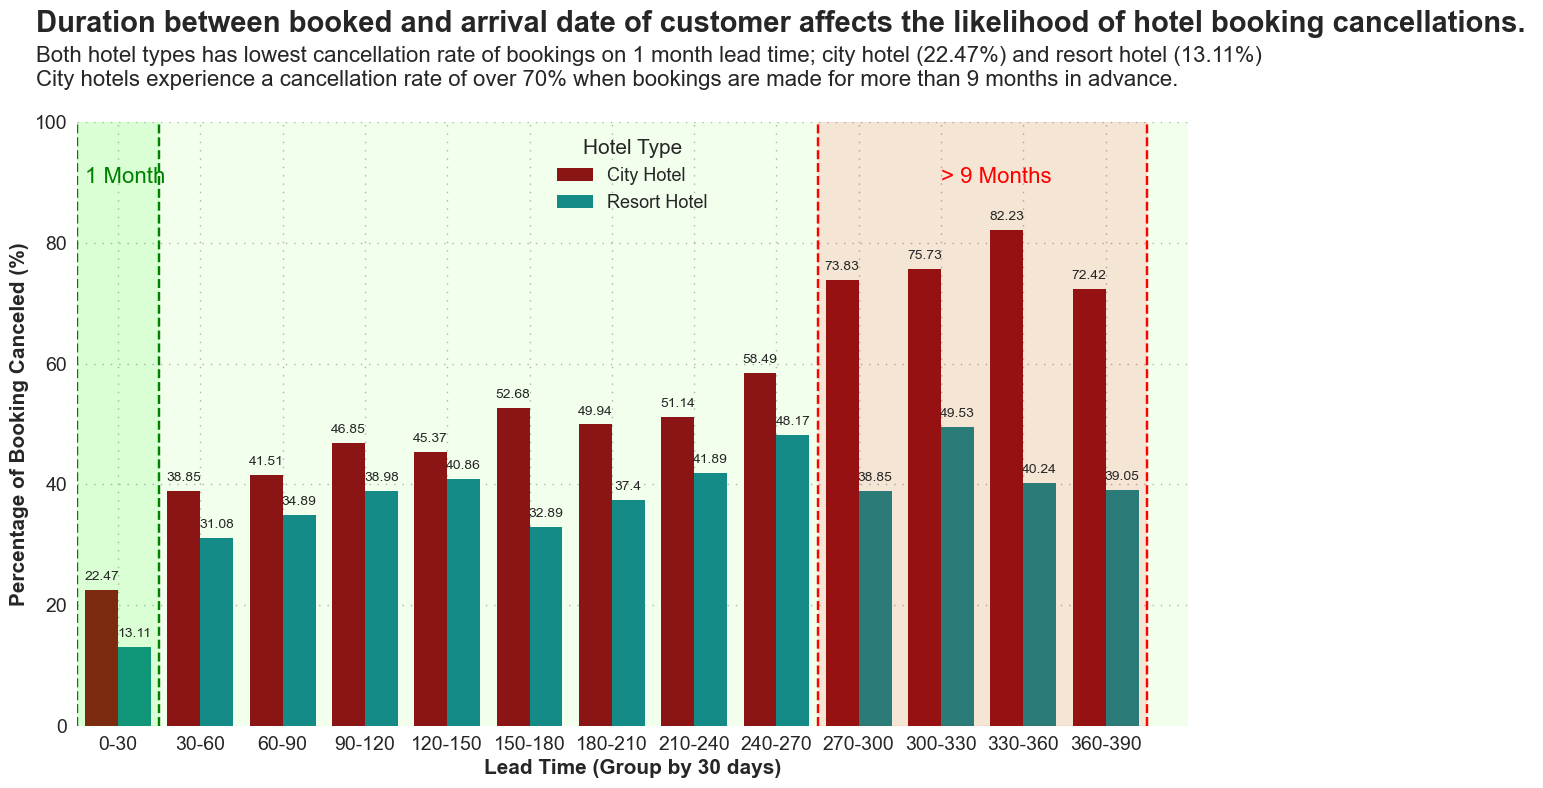

In [46]:
#Visualization
style.use('seaborn')

fig, ax = plt.subplots(figsize=(15, 8))

cols = ['#9f0000', '#009f99']
sns.barplot(x='lead_time_group', y='percentage_canceled', hue='hotel', data=df4_pivot, palette=cols)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_facecolor('#f3ffed')
ax.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.6)
ax.grid(which="major", axis="x", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.6)
ax.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}, loc ='best')

plt.bar_label(ax.containers[0], fontsize=10, padding=5)
plt.bar_label(ax.containers[1], fontsize=10, padding=5)

ax.text(x=-1, y=115, s="Duration between booked and arrival date of customer affects the likelihood of hotel booking cancellations. ", fontsize=21, fontweight='bold')
ax.text(x=-1, y=110, s="Both hotel types has lowest cancellation rate of bookings on 1 month lead time; city hotel (22.47%) and resort hotel (13.11%)", fontsize=16)
ax.text(x=-1, y=106, s="City hotels experience a cancellation rate of over 70% when bookings are made for more than 9 months in advance.", fontsize=16)
ax.axvline(-0.5, ls='--', color='green')
ax.axvline(0.5, ls='--', color='green')
ax.stackplot(np.arange(-0.5,1.5,1),[[100]], color='lime', alpha=0.1)
ax.text(x=-0.4, y=90, s='1 Month', fontsize=16, color='green')

ax.axvline(8.5, ls='--', color='red')
ax.axvline(12.5, ls='--', color='red')
ax.stackplot(np.arange(8.5,13.5,1),[[100]], color='red', alpha=0.1)
ax.text(x=10, y=90, s='> 9 Months', fontsize=16, color='red')

plt.xlabel('Lead Time (Group by 30 days)', fontsize=15, fontweight='bold')
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=15, fontweight='bold')
plt.ylim(0, 100)
plt.xlim(-0.5, 13)
plt.tight_layout()

Based on the data presented, the following conclusions can be drawn:

For both hotel types, the lowest cancellation rates occur when bookings are made one month in advance, with rates of 22.47% for city hotels and 13.11% for resort hotels.
When bookings are made more than nine months in advance, city hotels experience cancellation rates of over 70%, whereas resort hotels exhibit a more stable rate of around 40%.
The cancellation rate increases significantly for both hotel types each month, with city hotels increasing from around 20% to around 70% and resort hotels increasing from around 10% to around 40%. This trend may be due to cancelled vacation plans or customers forgetting about their bookings. To mitigate cancellations, hotels could send reminders to customers and implement a cancellation policy that applies to all bookings.

## Business Suggestion

Using the insights gained from the visualizations, the following recommendations can be made to the hospitality industry:

- To reduce the cancellation rate of hotel bookings, the hospitality industry could implement a penalty system for cancellations.
- The industry could also consider setting a maximum lead time or order distance of no more than three months to help reduce cancellations.
- To remind customers of their bookings, the industry could implement a reminder system, particularly for those who book well in advance.
- Finally, the industry could target its marketing efforts and offer products/services during peak travel periods, such as June-July and November-December, to attract more customers.